In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot
from keras.models import Model

In [23]:
model = VGG16(weights='imagenet',include_top=False)

img_path = 'dog.jpg'
img = image.load_img(img_path,target_size=(224,224))

In [28]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [25]:
features = model.predict(x)

In [26]:
features.shape

(1, 7, 7, 512)

In [27]:
features

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.9251077 ,  3.2480633 ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [30]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters,biases = layer.get_weights()
    print(layer.name,filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [31]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i,layer.name,layer.output.shape)

1 block1_conv1 (None, None, None, 64)
2 block1_conv2 (None, None, None, 64)
4 block2_conv1 (None, None, None, 128)
5 block2_conv2 (None, None, None, 128)
7 block3_conv1 (None, None, None, 256)
8 block3_conv2 (None, None, None, 256)
9 block3_conv3 (None, None, None, 256)
11 block4_conv1 (None, None, None, 512)
12 block4_conv2 (None, None, None, 512)
13 block4_conv3 (None, None, None, 512)
15 block5_conv1 (None, None, None, 512)
16 block5_conv2 (None, None, None, 512)
17 block5_conv3 (None, None, None, 512)


## Visualize feature map

In [174]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [175]:
model = Model(inputs=model.input,outputs=model.layers[-5].output)

In [176]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [178]:
img_path = 'dog.jpg'
img = image.load_img(img_path,target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
features = model.predict(x)

In [179]:
features.shape

(1, 7, 7, 512)

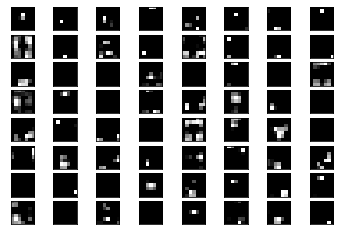

In [181]:
square = 8
ix = 1

for _ in range(square):
    for _ in range(square):
        ax = pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        pyplot.imshow(features[0,:,:,ix-1],cmap='gray')
        ix+=1
pyplot.show()

In [182]:
features

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.9251077 ,  3.2480633 ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [79]:
features.shape

(1, 224, 224, 64)

## Visualize Feature Maps from the Five Main Blocks

In [123]:
model = VGG16()
ixs = [2,5,9,13,17]
output = [model.layers[i].output for i in ixs]
model = Model(inputs=model.input,outputs=output)

In [124]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [128]:
img_path = 'dog.jpg'
img = image.load_img(img_path,target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
features = model.predict(x)

In [151]:
len(features)

5

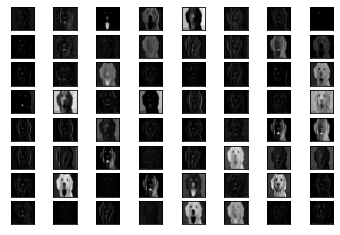

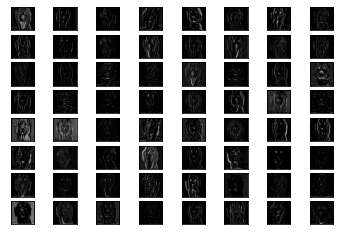

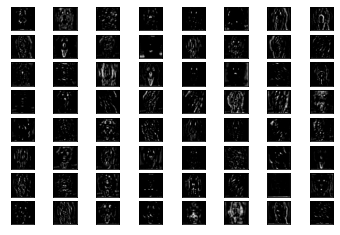

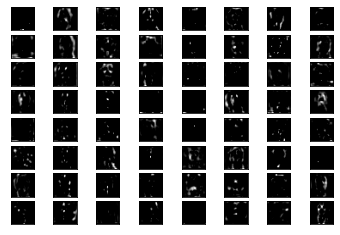

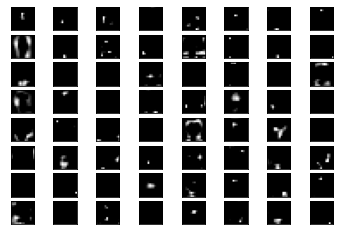

In [173]:
square = 8

for fmap in features:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])

            pyplot.imshow(fmap[0,:,:,ix-1],cmap='gray')

            ix+=1
            
    pyplot.show()
